## Model Selection

In [1]:
import sklearn

# Tell iPython to include plots inline within the notebook (as opposed to a seperate window)
%matplotlib inline

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

LR: 0.599543 (0.277733)


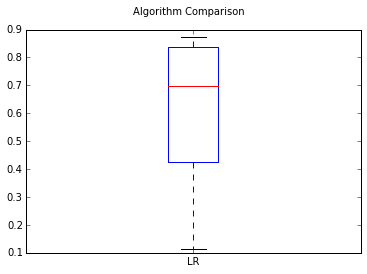

In [49]:
# Compare Algorithms
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

# Variety of algorithms to test
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
            parse_dates=True, 
            usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
            na_values=['nan'])
    
# sort data chronologically
df = df.sort_index(ascending=True, axis=0)
    
# add new column to view Adj Close 5 days later
df['Adj_Close_5_Days_Later'] = df['Adj Close']
df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)

# remove last 5 rows - remove NaNs
df = df[:-5]

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# prepare configuration for cross validation test harness
seed = 0

# prepare models
models = []
models.append(('LR', LinearRegression()))
# models.append(('KR', KernelRidge()))
# models.append(('SVR', SVR()))
# models.append(('KNR', KNeighborsRegressor()))
# models.append(('GPR', GaussianProcessRegressor()))
# models.append(('DTR', DecisionTreeRegressor()))
# models.append(('MLP', MLPRegressor()))
# models.append(('GBR', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()